In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
import nltk 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import math
#from googletrans import Translator
nltk.download('words')
from nltk.corpus import words 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from sklearn.cluster import MiniBatchKMeans
#!pip install -q wordcloud
#!pip install -q kmeans
import wordcloud


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pjatthi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# this will open the file
file = open("textfile.txt", "r",encoding="utf8")
read = file.read()
file.seek(0)
read

'Chapter 1\n\nI am by birth a Genevese, and my family is one of the most\ndistinguished of that republic.  My ancestors had been for many years\ncounsellors and syndics, and my father had filled several public\nsituations with honour and reputation.  He was respected by all who\nknew him for his integrity and indefatigable attention to public\nbusiness.  He passed his younger days perpetually occupied by the\naffairs of his country; a variety of circumstances had prevented his\nmarrying early, nor was it until the decline of life that he became a\nhusband and the father of a family.\n\nAs the circumstances of his marriage illustrate his character, I cannot\nrefrain from relating them.  One of his most intimate friends was a\nmerchant who, from a flourishing state, fell, through numerous\nmischances, into poverty.  This man, whose name was Beaufort, was of a\nproud and unbending disposition and could not bear to live in poverty\nand oblivion in the same country where he had formerly bee

## 1) Remove Stopwords (1 Mark) 
## 2) Remove the punctuations. the special characters and convert the text to lower case.        (2 Mark)

In [3]:
# to obtain the
# number of lines
# in file
line = 1
for word in read:
    if word == '\n':
        line += 1
print("Number of lines in file is: ", line)

Number of lines in file is:  258


In [4]:
# create a list to
# store each line as
# an element of list
array = []
for i in range(line):
    array.append(file.readline())
  
array

['Chapter 1\n',
 '\n',
 'I am by birth a Genevese, and my family is one of the most\n',
 'distinguished of that republic.  My ancestors had been for many years\n',
 'counsellors and syndics, and my father had filled several public\n',
 'situations with honour and reputation.  He was respected by all who\n',
 'knew him for his integrity and indefatigable attention to public\n',
 'business.  He passed his younger days perpetually occupied by the\n',
 'affairs of his country; a variety of circumstances had prevented his\n',
 'marrying early, nor was it until the decline of life that he became a\n',
 'husband and the father of a family.\n',
 '\n',
 'As the circumstances of his marriage illustrate his character, I cannot\n',
 'refrain from relating them.  One of his most intimate friends was a\n',
 'merchant who, from a flourishing state, fell, through numerous\n',
 'mischances, into poverty.  This man, whose name was Beaufort, was of a\n',
 'proud and unbending disposition and could not be

In [5]:
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
punc = '''!()-[]{};:'"“\, <>./?@#$%^&*_~'''
for ele in read:  
    if ele in punc:  
        read = read.replace(ele, " ")  
          
read
  
# to maintain uniformity
read=read.lower()   
read = "".join([word.lower() for word in read if word not in string.punctuation])
read = ' '.join(re.sub("(@[A-Za-z0–9]+)|([^-9A-Za-z \t])|(\w+:\/\/\S+)"," ",read).split())
tokens = re.split('\W+', read)
read = [ps.stem(word) for word in tokens if word not in stopwords]
read

['chapter',
 'birth',
 'geneves',
 'famili',
 'one',
 'distinguish',
 'republ',
 'ancestor',
 'mani',
 'year',
 'counsellor',
 'syndic',
 'father',
 'fill',
 'sever',
 'public',
 'situat',
 'honour',
 'reput',
 'respect',
 'knew',
 'integr',
 'indefatig',
 'attent',
 'public',
 'busi',
 'pass',
 'younger',
 'day',
 'perpetu',
 'occupi',
 'affair',
 'countri',
 'varieti',
 'circumst',
 'prevent',
 'marri',
 'earli',
 'declin',
 'life',
 'becam',
 'husband',
 'father',
 'famili',
 'circumst',
 'marriag',
 'illustr',
 'charact',
 'cannot',
 'refrain',
 'relat',
 'one',
 'intim',
 'friend',
 'merchant',
 'flourish',
 'state',
 'fell',
 'numer',
 'mischanc',
 'poverti',
 'man',
 'whose',
 'name',
 'beaufort',
 'proud',
 'unbend',
 'disposit',
 'could',
 'bear',
 'live',
 'poverti',
 'oblivion',
 'countri',
 'formerli',
 'distinguish',
 'rank',
 'magnific',
 'paid',
 'debt',
 'therefor',
 'honour',
 'manner',
 'retreat',
 'daughter',
 'town',
 'lucern',
 'live',
 'unknown',
 'wretched',
 'fa

## 3) create bigrams and trigrams for the entire dataset and list down 20 most frequent bigram and 20 most frequent trigrams ( 3 Marks )

In [6]:
#print top 20 bigrams
(pd.Series(nltk.ngrams(read, 2)).value_counts())[:20]

(return, us)            3
(attend, sickb)         2
(long, time)            2
(nativ, countri)        2
(natur, philosophi)     2
(two, year)             2
(thought, return)       2
(air, climb)            1
(becam, husband)        1
(distemp, elizabeth)    1
(chivalri, romanc)      1
(none, experienc)       1
(caught, scarlet)       1
(yield, point)          1
(discrimin, modern)     1
(disappear, light)      1
(wander, life)          1
(rapidli, end)          1
(hope, meet)            1
(raptur, unfold)        1
dtype: int64

In [7]:
#print top 30 bigrams
(pd.Series(nltk.ngrams(read, 3)).value_counts())[:20]

(experienc, conceiv, entic)    1
(sole, wrap, improv)           1
(amount, agoni, collect)       1
(clear, facil, apprehens)      1
(persuad, begin, world)        1
(instrument, life, around)     1
(make, us, act)                1
(parent, pass, consider)       1
(strength, proceed, soon)      1
(chapter, ill, ill)            1
(situat, honour, reput)        1
(paid, debt, therefor)         1
(elizabeth, love, must)        1
(would, consid, rave)          1
(departur, therefor, fix)      1
(meet, anoth, world)           1
(power, applic, look)          1
(pursu, one, studi)            1
(probabl, wait, impati)        1
(sensat, rememb, birth)        1
dtype: int64

## 4) You have to implement TF-IDF the Algorithm from scratch.   ( 3 Mark )


In [8]:
## to insert all chapters into separate output files. Manually writing last chapter
out_n = 0
done = False
with open("textfile.txt",encoding="utf8") as in_file:
    while not done: #loop over output file names
        with open(f"out{out_n}.txt", "w") as out_file: #generate an output file name
            while not done: #loop over lines in inuput file and write to output file
                try:
                    line = next(in_file).strip() #strip whitespace for consistency
                except StopIteration:
                    done = True
                    break
                if "Chapter" in line: #more robust than 'if line == "SPLIT\n":'
                    break
                else:
                    out_file.write(line + '\n') #must add back in newline because we stripped it out earlier 
            out_n += 1 #increment output file name integer

In [9]:
#corpus = []
# this will open the file
file = open("out1.txt", "r")
corpus1 = file.read()
file = open("out2.txt", "r")
corpus2 = file.read()
file = open("out3.txt", "r")
corpus3 = file.read()
file = open("out4.txt", "r")
corpus4 = file.read()
file = open("out5.txt", "r")
corpus5 = file.read()
file = open("out6.txt", "r")
corpus6 = file.read()
file = open("out7.txt", "r")
corpus7 = file.read()
file = open("out8.txt", "r")
corpus8 = file.read()

In [10]:
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
def clean(txt):
    punc = '''!()-[]{};:“'"\, <>./?@#$%^&*_~'''
    for ele in txt:  
      if ele in punc: 
        txt = txt.replace(ele, " ")
    txt = txt.lower()
    txt = "".join([word.lower() for word in txt if word not in string.punctuation])
    txt = ' '.join(re.sub("(@[A-Za-z0–9]+)|([^-9A-Za-z \t])|(\w+:\/\/\S+)"," ",txt).split())
    tokens = re.split('\W+', txt)
    txt = [ps.stem(word) for word in tokens if word not in stopwords]
    return txt
clean(corpus1)

['birth',
 'geneves',
 'famili',
 'one',
 'distinguish',
 'republ',
 'ancestor',
 'mani',
 'year',
 'counsellor',
 'syndic',
 'father',
 'fill',
 'sever',
 'public',
 'situat',
 'honour',
 'reput',
 'respect',
 'knew',
 'integr',
 'indefatig',
 'attent',
 'public',
 'busi',
 'pass',
 'younger',
 'day',
 'perpetu',
 'occupi',
 'affair',
 'countri',
 'varieti',
 'circumst',
 'prevent',
 'marri',
 'earli',
 'declin',
 'life',
 'becam',
 'husband',
 'father',
 'famili',
 'circumst',
 'marriag',
 'illustr',
 'charact',
 'cannot',
 'refrain',
 'relat',
 'one',
 'intim',
 'friend',
 'merchant',
 'flourish',
 'state',
 'fell',
 'numer',
 'mischanc',
 'poverti',
 'man',
 'whose',
 'name',
 'beaufort',
 'proud',
 'unbend',
 'disposit',
 'could',
 'bear',
 'live',
 'poverti',
 'oblivion',
 'countri',
 'formerli',
 'distinguish',
 'rank',
 'magnific',
 'paid',
 'debt',
 'therefor',
 'honour',
 'manner',
 'retreat',
 'daughter',
 'town',
 'lucern',
 'live',
 'unknown',
 'wretched',
 'father',
 'lov

In [11]:
print(corpus1)


I am by birth a Genevese, and my family is one of the most
distinguished of that republic.  My ancestors had been for many years
counsellors and syndics, and my father had filled several public
situations with honour and reputation.  He was respected by all who
knew him for his integrity and indefatigable attention to public
business.  He passed his younger days perpetually occupied by the
affairs of his country; a variety of circumstances had prevented his
marrying early, nor was it until the decline of life that he became a
husband and the father of a family.

As the circumstances of his marriage illustrate his character, I cannot
refrain from relating them.  One of his most intimate friends was a
merchant who, from a flourishing state, fell, through numerous
mischances, into poverty.  This man, whose name was Beaufort, was of a
proud and unbending disposition and could not bear to live in poverty
and oblivion in the same country where he had formerly been
distinguished for his rank

In [12]:
tokens_without_sw1 = clean(corpus1)
tokens_without_sw2 = clean(corpus2)
tokens_without_sw3 = clean(corpus3)
tokens_without_sw4 = clean(corpus4)
tokens_without_sw5 = clean(corpus5)
tokens_without_sw6 = clean(corpus6)
tokens_without_sw7 = clean(corpus7)
tokens_without_sw8 = clean(corpus8)

In [13]:
print(tokens_without_sw2)

['brought', 'togeth', 'quit', 'year', 'differ', 'age', 'need', 'say', 'stranger', 'speci', 'disunion', 'disput', 'harmoni', 'soul', 'companionship', 'divers', 'contrast', 'subsist', 'charact', 'drew', 'us', 'nearer', 'togeth', 'elizabeth', 'calmer', 'concentr', 'disposit', 'ardour', 'capabl', 'intens', 'applic', 'deepli', 'smitten', 'thirst', 'knowledg', 'busi', 'follow', 'aerial', 'creation', 'poet', 'majest', 'wondrou', 'scene', 'surround', 'swiss', 'home', 'sublim', 'shape', 'mountain', 'chang', 'season', 'tempest', 'calm', 'silenc', 'winter', 'life', 'turbul', 'alpin', 'summer', 'found', 'ampl', 'scope', 'admir', 'delight', 'companion', 'contempl', 'seriou', 'satisfi', 'spirit', 'magnific', 'appear', 'thing', 'delight', 'investig', 'caus', 'world', 'secret', 'desir', 'divin', 'curios', 'earnest', 'research', 'learn', 'hidden', 'law', 'natur', 'glad', 'akin', 'raptur', 'unfold', 'among', 'earliest', 'sensat', 'rememb', 'birth', 'second', 'son', 'junior', 'seven', 'year', 'parent', '

In [14]:
corpus = []
corpus.append(tokens_without_sw1)
corpus.append(tokens_without_sw2)
corpus.append(tokens_without_sw3)
corpus.append(tokens_without_sw4)
corpus.append(tokens_without_sw5)
corpus.append(tokens_without_sw6)
corpus.append(tokens_without_sw7)
corpus.append(tokens_without_sw8)

In [15]:
total= set(tokens_without_sw1).union(set(tokens_without_sw2))
total = set(total).union(set(tokens_without_sw3))
total = set(total).union(set(tokens_without_sw4))
total = set(total).union(set(tokens_without_sw5))
total = set(total).union(set(tokens_without_sw6))
total = set(total).union(set(tokens_without_sw7))
total = set(total).union(set(tokens_without_sw8))
print(total)

{'hour', 'gave', 'select', 'progress', 'sli', 'activ', 'written', 'caus', 'poor', 'inquiri', 'constrain', 'grave', 'romanc', 'engag', 'good', 'pen', 'anoth', 'light', 'stay', 'sixteen', 'sorrow', 'king', 'illustr', 'conduc', 'time', 'enorm', 'research', 'scarlet', 'power', 'absenc', 'dusk', 'prognost', 'white', 'attest', 'smitten', 'fill', 'laboratori', 'resolv', 'servic', 'guilti', 'distanc', 'trembl', 'sickb', 'prepar', 'indulg', 'delin', 'world', 'fanci', 'henri', 'soul', 'geniu', 'silenc', 'wretched', 'contrast', 'indiffer', 'drawn', 'candl', 'sepulchr', 'quickli', 'star', 'write', 'infal', 'proud', 'mere', 'caught', 'mockeri', 'capabl', 'know', 'confus', 'vigor', 'quit', 'fluctuat', 'excit', 'ingolstadt', 'proport', 'avoid', 'part', 'drew', 'play', 'inquir', 'aerial', 'numer', 'creatur', 'lost', 'grief', 'exult', 'straight', 'god', 'rather', 'place', 'hope', 'set', 'strength', 'necessari', 'gentl', 'persuad', 'boy', 'tempt', 'brother', 'daughter', 'probabl', 'campagn', 'look', 'me

In [16]:
wordDict1 = dict.fromkeys(total, 0) 
wordDict2 = dict.fromkeys(total, 0)
wordDict3 = dict.fromkeys(total, 0) 
wordDict4 = dict.fromkeys(total, 0)
wordDict5 = dict.fromkeys(total, 0) 
wordDict6 = dict.fromkeys(total, 0)
wordDict7 = dict.fromkeys(total, 0) 
wordDict8 = dict.fromkeys(total, 0)
for word in tokens_without_sw1:
    wordDict1[word]+=1
    
for word in tokens_without_sw2:
    wordDict2[word]+=1

for word in tokens_without_sw3:
    wordDict3[word]+=1
for word in tokens_without_sw4:
    wordDict4[word]+=1
for word in tokens_without_sw5:
    wordDict5[word]+=1
for word in tokens_without_sw6:
    wordDict6[word]+=1
for word in tokens_without_sw7:
    wordDict7[word]+=1
for word in tokens_without_sw8:
    wordDict8[word]+=1

In [17]:
pd.DataFrame([wordDict1, wordDict2,wordDict3, wordDict4,wordDict5, wordDict6,wordDict7, wordDict8])

,hour,gave,select,progress,sli,activ,written,caus,poor,inquiri,...,suffici,seven,way,hard,impati,year,fear,tri,facil,countri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,2,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,2,1,0,1,0,0,1,...,0,0,1,0,0,2,0,0,1,0
4,0,0,2,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)
#running our sentences through the tf function:
tf1 = computeTF(wordDict1, tokens_without_sw1)
tf2 = computeTF(wordDict2, tokens_without_sw2)
tf3 = computeTF(wordDict3, tokens_without_sw3)
tf4 = computeTF(wordDict4, tokens_without_sw4)
tf5 = computeTF(wordDict5, tokens_without_sw5)
tf6 = computeTF(wordDict6, tokens_without_sw6)
tf7 = computeTF(wordDict7, tokens_without_sw7)
tf8 = computeTF(wordDict8, tokens_without_sw8)
#Converting to dataframe for visualization
tf = pd.DataFrame([tf1, tf2,tf3, tf4,tf5, tf6,tf7, tf8])

In [19]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return(idfDict)
#inputing our sentences in the log file
idfs = computeIDF([wordDict1, wordDict2,wordDict3, wordDict4,wordDict5, wordDict6,wordDict7, wordDict8])

In [20]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return(tfidf)
#running our two sentences through the IDF:
tfidf1 = computeTFIDF(tf1, idfs)
tfidf2 = computeTFIDF(tf2, idfs)
tfidf3 = computeTFIDF(tf3, idfs)
tfidf4 = computeTFIDF(tf4, idfs)
tfidf5 = computeTFIDF(tf5, idfs)
tfidf6 = computeTFIDF(tf6, idfs)
tfidf7 = computeTFIDF(tf7, idfs)
tfidf8 = computeTFIDF(tf8, idfs)
#putting it in a dataframe
tfidf= pd.DataFrame([tfidf1, tfidf2,tfidf3, tfidf4,tfidf5, tfidf6,tfidf7, tfidf8])

In [21]:
tfidf

,hour,gave,select,progress,sli,activ,written,caus,poor,inquiri,...,suffici,seven,way,hard,impati,year,fear,tri,facil,countri
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.007526,0.000000,0.000000,0.000000,0.015051
1,0.000000,0.004561,0.000000,0.000000,0.000000,0.000000,0.000000,0.004561,0.000000,0.000000,...,0.000000,0.004561,0.000000,0.000000,0.00000,0.009122,0.000000,0.004561,0.000000,0.004561
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006405,0.00000,0.000000,0.000000,0.000000,0.000000,0.006405
3,0.000000,0.000000,0.000000,0.008323,0.004162,0.000000,0.004162,0.000000,0.000000,0.004162,...,0.000000,0.000000,0.004162,0.000000,0.00000,0.008323,0.000000,0.000000,0.004162,0.000000
4,0.000000,0.000000,0.007083,0.000000,0.000000,0.003542,0.000000,0.000000,0.003542,0.000000,...,0.003542,0.000000,0.000000,0.003542,0.00000,0.000000,0.003542,0.000000,0.000000,0.003542
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00821,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.005864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011728,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.005864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011728,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


## 5) Use the above-implemented algorithm and the values to calculate TF-IDF (using TF IDF formula) on the dataset and list down the top 10 words which have the highest TF-IDF Value. (2 Marks)

In [22]:
test=tfidf.sum(axis = 0, skipna = True)
print(test.sort_values(ascending=False).head(10))

would     0.070417
father    0.050657
one       0.046747
attend    0.045051
life      0.044728
return    0.044084
appear    0.039746
eye       0.038750
yet       0.038243
happi     0.036290
dtype: float64


## 6) to 9) Perform Part of Speech Tagging using the Viterbi Algorithm, 
6) Label the cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 )   ( 2 Mark )
7) Split the Train and the Test Dataset                      (1 Mark)
8) Implement the Viterbi Algorithm ( you can use Library) to get the Part of Speech Tagging.        ( 3 Marks)
9) Calculate the Accuracy and F1 score. ( Number of Predicted Correct Tag in the test set / Total number of Data points in the test set)   (2 Marks)


In [23]:
data = []
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['chapter'])
for i in range(8):
    df = df.append({'chapter': i+1}, ignore_index=True)
df.insert(1, "Content", [tokens_without_sw1, tokens_without_sw2,tokens_without_sw3,tokens_without_sw4,tokens_without_sw5,tokens_without_sw6,tokens_without_sw7,tokens_without_sw8], allow_duplicates=True)
#df = df.append({'Content':corpus1},ignore_index=True)
#df['chapter'] ={}
print(df)

  chapter                                            Content
0       1  [birth, geneves, famili, one, distinguish, rep...
1       2  [brought, togeth, quit, year, differ, age, nee...
2       3  [attain, age, seventeen, parent, resolv, becom...
3       4  [day, natur, philosophi, particularli, chemist...
4       5  [dreari, night, novemb, beheld, accomplish, to...
5       6  [probabl, wait, impati, letter, fix, date, ret...
6       7  [pass, sad, hour, eleven, clock, trial, commen...
7       8  [pass, sad, hour, eleven, clock, trial, commen...


In [24]:
tagged1 = nltk.pos_tag(tokens_without_sw1) 
tagged2 = nltk.pos_tag(tokens_without_sw2) 
tagged3 = nltk.pos_tag(tokens_without_sw3) 
tagged4 = nltk.pos_tag(tokens_without_sw4) 
tagged5 = nltk.pos_tag(tokens_without_sw5) 
tagged6 = nltk.pos_tag(tokens_without_sw6) 
tagged7 = nltk.pos_tag(tokens_without_sw7) 
tagged8 = nltk.pos_tag(tokens_without_sw8) 

In [25]:
mod_sent_tag=[]
tagged1.insert(0,('##','##'))
tagged1.append(('&&','&&'))
tagged2.insert(0,('##','##'))
tagged2.append(('&&','&&'))
tagged3.insert(0,('##','##'))
tagged3.append(('&&','&&'))
tagged4.insert(0,('##','##'))
tagged4.append(('&&','&&'))
tagged5.insert(0,('##','##'))
tagged5.append(('&&','&&'))
tagged6.insert(0,('##','##'))
tagged6.append(('&&','&&'))
tagged7.insert(0,('##','##'))
tagged7.append(('&&','&&'))
tagged8.insert(0,('##','##'))
tagged8.append(('&&','&&'))
mod_sent_tag.append(tagged1)
mod_sent_tag.append(tagged2)
mod_sent_tag.append(tagged3)
mod_sent_tag.append(tagged4)
mod_sent_tag.append(tagged5)
mod_sent_tag.append(tagged6)
mod_sent_tag.append(tagged7)
mod_sent_tag.append(tagged8)

In [26]:
#Splitting the data for train and test
split_num = int(len(mod_sent_tag)*0.9)
train_data = mod_sent_tag[0:split_num]
test_data = mod_sent_tag[split_num:]
print(train_data[0])

[('##', '##'), ('birth', 'NN'), ('geneves', 'NNS'), ('famili', 'VBP'), ('one', 'CD'), ('distinguish', 'JJ'), ('republ', 'NN'), ('ancestor', 'NN'), ('mani', 'CD'), ('year', 'NN'), ('counsellor', 'NN'), ('syndic', 'NN'), ('father', 'NN'), ('fill', 'NN'), ('sever', 'VBZ'), ('public', 'JJ'), ('situat', 'FW'), ('honour', 'NN'), ('reput', 'NN'), ('respect', 'VBP'), ('knew', 'VBN'), ('integr', 'JJ'), ('indefatig', 'JJ'), ('attent', 'JJ'), ('public', 'JJ'), ('busi', 'NN'), ('pass', 'NN'), ('younger', 'JJR'), ('day', 'NN'), ('perpetu', 'VB'), ('occupi', 'IN'), ('affair', 'NN'), ('countri', 'NN'), ('varieti', 'NN'), ('circumst', 'NN'), ('prevent', 'NN'), ('marri', 'NN'), ('earli', 'NN'), ('declin', 'JJ'), ('life', 'NN'), ('becam', 'NN'), ('husband', 'NN'), ('father', 'NN'), ('famili', 'NN'), ('circumst', 'NN'), ('marriag', 'NN'), ('illustr', 'NN'), ('charact', 'NN'), ('cannot', 'NN'), ('refrain', 'VB'), ('relat', 'JJ'), ('one', 'CD'), ('intim', 'NN'), ('friend', 'NN'), ('merchant', 'NN'), ('flou

In [27]:
#Creating a dictionary whose keys are tags and values contain words which were assigned the correspoding tag
# ex:- 'TAG':{word1: count(word1,'TAG')}
train_word_tag = {}
for s in train_data:
  for (w,t) in s:
    w=w.lower()
    try:
      try:
        train_word_tag[t][w]+=1
      except:
        train_word_tag[t][w]=1
    except:
      train_word_tag[t]={w:1}

In [28]:
#Calculating the emission probabilities using train_word_tag
train_emission_prob={}
for k in train_word_tag.keys():
  train_emission_prob[k]={}
  count = sum(train_word_tag[k].values())
  for k2 in train_word_tag[k].keys():
    train_emission_prob[k][k2]=train_word_tag[k][k2]/count

In [29]:
#Estimating the bigram of tags to be used for transition probability
bigram_tag_data = {}
for s in train_data:
  bi=list(nltk.bigrams(s))
  for b1,b2 in bi:
    try:
      try:
        bigram_tag_data[b1[1]][b2[1]]+=1
      except:
        bigram_tag_data[b1[1]][b2[1]]=1
    except:
      bigram_tag_data[b1[1]]={b2[1]:1}

In [30]:
#Calculating the probabilities of tag bigrams for transition probability  
bigram_tag_prob={}
for k in bigram_tag_data.keys():
  bigram_tag_prob[k]={}
  count=sum(bigram_tag_data[k].values())
  for k2 in bigram_tag_data[k].keys():
    bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count

In [31]:
#Calculating the possible tags for each word
#Note: Here we have used the whole data(Train+Test)
#Reason: There may be some words which are not present in train data but are present in test data 
tags_of_tokens = {}
count=0
for s in train_data:
  for (w,t) in s:
    w=w.lower()
    try:
      if t not in tags_of_tokens[w]:
        tags_of_tokens[w].append(t)
    except:
      l = []
      l.append(t)
      tags_of_tokens[w] = l
        
for s in test_data:
  for (w,t) in s:
    w=w.lower()
    try:
      if t not in tags_of_tokens[w]:
        tags_of_tokens[w].append(t)
    except:
      l = []
      l.append(t)
      tags_of_tokens[w] = l

In [32]:
#Dividing the test data into test words and test tags
test_words=[]
test_tags=[]
for s in test_data:
  temp_word=[]
  temp_tag=[]
  for (w,t) in s:
    temp_word.append(w.lower())
    temp_tag.append(t)
  test_words.append(temp_word)
  test_tags.append(temp_tag)

In [33]:
#Executing the Viterbi Algorithm
predicted_tags = []                #intializing the predicted tags
for x in range(len(test_words)):   # for each tokenized sentence in the test data
  s = test_words[x]
  #storing_values is a dictionary which stores the required values
  #ex: storing_values = {step_no.:{state1:[previous_best_state,value_of_the_state]}}                
  storing_values = {}              
  for q in range(len(s)):
    step = s[q]
    #for the starting word of the sentence
    if q == 1:                
      storing_values[q] = {}
      tags = tags_of_tokens[step]
      for t in tags:
        #this is applied since we do not know whether the word in the test data is present in train data or not
        try:
          storing_values[q][t] = ['##',bigram_tag_prob['##'][t]*train_emission_prob[t][step]]
        #if word is not present in the train data but present in test data we assign a very low probability of 0.0001
        except:
          storing_values[q][t] = ['##',0.0001]#*train_emission_prob[t][step]]
    
    #if the word is not at the start of the sentence
    if q>1:
      storing_values[q] = {}
      previous_states = list(storing_values[q-1].keys())   # loading the previous states
      current_states  = tags_of_tokens[step]               # loading the current states
      #calculation of the best previous state for each current state and then storing
      #it in storing_values
      for t in current_states:                             
        temp = []
        for pt in previous_states:                         
          try:
            temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
          except:
            temp.append(storing_values[q-1][pt][1]*0.0001)
        max_temp_index = temp.index(max(temp))
        best_pt = previous_states[max_temp_index]
        storing_values[q][t]=[best_pt,max(temp)]

  #Backtracing to extract the best possible tags for the sentence
  pred_tags = []
  total_steps_num = storing_values.keys()
  last_step_num = max(total_steps_num)
  for bs in range(len(total_steps_num)):
    step_num = last_step_num - bs
    if step_num == last_step_num:
      pred_tags.append('&&')
      pred_tags.append(storing_values[step_num]['&&'][0])
    if step_num<last_step_num and step_num>0:
      pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
  predicted_tags.append(list(reversed(pred_tags)))

In [34]:
#Calculating the accuracy based on tagging each word in the test data.
right = 0 
wrong = 0
for i in range(len(test_tags)):
  gt = test_tags[i]
  pred = predicted_tags[i]
  for h in range(len(gt)):
    if gt[h] == pred[h]:
      right = right+1
    else:
      wrong = wrong +1 

print('Accuracy on the test data is: ',right/(right+wrong))
print('Loss on the test data is: ',wrong/(right+wrong))

Accuracy on the test data is:  0.9423076923076923
Loss on the test data is:  0.057692307692307696


In [54]:
# function to get unique values
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x)

In [62]:
unique(gt)
unique(pred)

##
NN
JJ
RB
VBZ
IN
NNS
MD
VB
CD
CC
VBP
VBN
FW
VBD
PRP
&&
##
NN
JJ
RB
VBZ
IN
NNS
MD
VB
CD
CC
VBP
VBN
FW
VBD
PRP
&&


In [60]:
print(gt)
print(pred)

['##', 'NN', 'JJ', 'NN', 'RB', 'VBZ', 'NN', 'NN', 'NN', 'NN', 'NN', 'IN', 'JJ', 'NN', 'JJ', 'NN', 'JJ', 'NN', 'NN', 'JJ', 'NN', 'JJ', 'NN', 'NN', 'IN', 'NN', 'NNS', 'NN', 'NN', 'MD', 'VB', 'NN', 'CD', 'NN', 'VB', 'CD', 'NN', 'CC', 'JJ', 'NN', 'NN', 'RB', 'JJ', 'NN', 'NN', 'NN', 'NN', 'MD', 'VB', 'NN', 'NN', 'NN', 'NN', 'RB', 'JJ', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'VBP', 'VBN', 'JJ', 'NN', 'RB', 'MD', 'VB', 'NN', 'NN', 'NN', 'NN', 'JJ', 'NN', 'NN', 'MD', 'VB', 'VB', 'NN', 'MD', 'VB', 'NN', 'IN', 'JJ', 'JJ', 'NN', 'NN', 'VBP', 'RB', 'JJ', 'NN', 'NN', 'VB', 'NN', 'NN', 'RB', 'JJ', 'NN', 'NN', 'NN', 'IN', 'NN', 'FW', 'CD', 'NN', 'NN', 'MD', 'VB', 'JJ', 'NN', 'NN', 'JJ', 'NN', 'NN', 'NN', 'NN', 'NN', 'RB', 'JJ', 'NN', 'NN', 'JJ', 'NN', 'NN', 'NN', 'NN', 'NN', 'VBP', 'JJ', 'JJ', 'NN', 'VBD', 'NN', 'NN', 'VBZ', 'JJ', 'NN', 'JJ', 'VBP', 'JJ', 'NN', 'VBD', 'PRP', 'VB', 'JJ', 'NN', 'NN', 'VBP', 'VBP', 'RB', 'JJ', 'NN', '&&']
['##', 'NN', 'JJ', 'NN', 'RB', 'VBZ', 'NN', 'NN', 

##   Topic Modelling        
Use cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 ) 
10) Using the LDA algorithm create the Topics (10) for the Corpus             (3 Marks)
11) List down the 10 words in each of the Topics Extracted.           (2 Marks)


In [38]:
pip install wordcloud

In [39]:
print(total)

{'hour', 'gave', 'select', 'progress', 'sli', 'activ', 'written', 'caus', 'poor', 'inquiri', 'constrain', 'grave', 'romanc', 'engag', 'good', 'pen', 'anoth', 'light', 'stay', 'sixteen', 'sorrow', 'king', 'illustr', 'conduc', 'time', 'enorm', 'research', 'scarlet', 'power', 'absenc', 'dusk', 'prognost', 'white', 'attest', 'smitten', 'fill', 'laboratori', 'resolv', 'servic', 'guilti', 'distanc', 'trembl', 'sickb', 'prepar', 'indulg', 'delin', 'world', 'fanci', 'henri', 'soul', 'geniu', 'silenc', 'wretched', 'contrast', 'indiffer', 'drawn', 'candl', 'sepulchr', 'quickli', 'star', 'write', 'infal', 'proud', 'mere', 'caught', 'mockeri', 'capabl', 'know', 'confus', 'vigor', 'quit', 'fluctuat', 'excit', 'ingolstadt', 'proport', 'avoid', 'part', 'drew', 'play', 'inquir', 'aerial', 'numer', 'creatur', 'lost', 'grief', 'exult', 'straight', 'god', 'rather', 'place', 'hope', 'set', 'strength', 'necessari', 'gentl', 'persuad', 'boy', 'tempt', 'brother', 'daughter', 'probabl', 'campagn', 'look', 'me

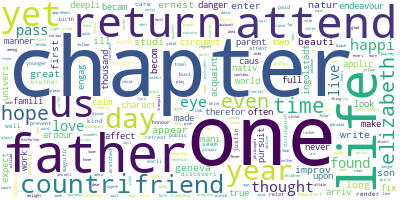

In [42]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
#long_string = ','.join(list(papers['paper_text_processed'].values))
long_string = ','.join(list(read))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [43]:
#Prepare text for LDA analysis
#Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. 
#We start by converting the documents into a simple vector representation (Bag of Words BOW). 
#Next, we will convert a list of titles into lists of vectors, all with length equal to the vocabulary.
#We’ll then plot the ten most frequent words based on the outcome of this operation (the list of document vectors). 
#As a check, these words should also occur in the word cloud.
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [44]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

C:\Users\pjatthi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


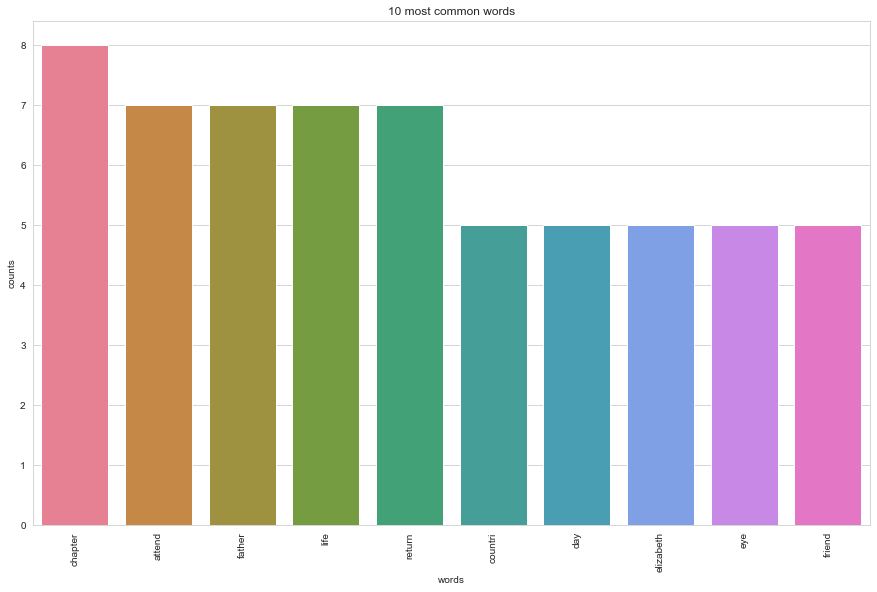

In [46]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(read)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [47]:
#LDA model tranining
#To keep things simple, we will only tweak the number of topic parameters.
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
return time ernest enter great appear beauti manner saw swiss

Topic #1:
pass applic kind nativ glad knowledg futur philosophi far anxieti

Topic #2:
countri happi write long live ardour persuad death form gone

Topic #3:
chapter attend eye friend love studi ill mind endeavour becom

Topic #4:
thought hope parent affect pursuit care true charact therefor work

Topic #5:
year son natur look circumst deepli ingolstadt caus soul whilst

Topic #6:
improv geneva fix justin famili arriv discoveri seek waldman attain

Topic #7:
father mani world engag thousand expect univers calm unit point

Topic #8:
danger make acquaint sickb school possess court walk home resolv

Topic #9:
life day elizabeth render brother becam younger yield place play
